<h1>IMPLEMENTING SPECTRAL CO-CLUSTERING (Algo 1)<h1>

Text(0.5, 1.0, 'Original dataset')

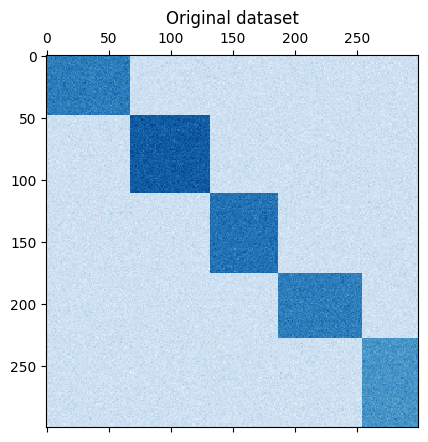

In [1]:
# Following code is used to make a Bicluster dataset of 300x300, with 5 clusters, using the 'make_biclusters' from sklearn.datasets. 
# This Dataset is then shuffled. Then using the Spectral Co-Clustering algorithm we get the biclusters.
# We also compare the original dataset and the one which is generated after implementing Spectral Co-Clustering using the consensus score

import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_biclusters
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

In [2]:
print(data)

[[ 51.5757319   56.55972725  58.18246778 ...  -2.58981343   2.89899398
   -6.7686642 ]
 [ 55.79558203  58.80013477  55.35263508 ...  -1.41497175  -3.2799709
    6.21064248]
 [ 52.05043305  63.61855062  56.472263   ...  -7.49061145   9.54450971
    3.42989718]
 ...
 [  2.96957381  10.05407575  -7.85798359 ...  44.17903127  47.18611831
   47.27390074]
 [ -4.55871438 -14.12124735 -11.06268131 ...  45.86252493  47.12698751
   45.18566039]
 [  0.11249079  -5.41797015   6.12839887 ...  48.82969145  50.03185852
   43.55138377]]


Text(0.5, 1.0, 'Shuffled dataset')

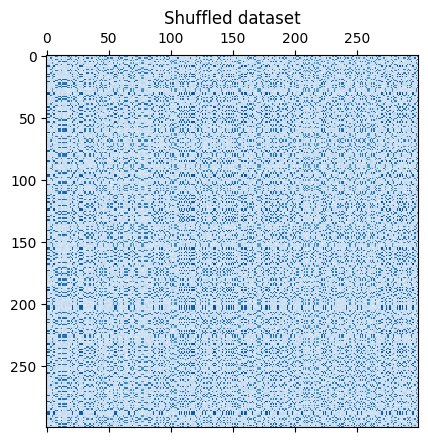

In [27]:
# Shuffle the dataset
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

consensus score: 1.000


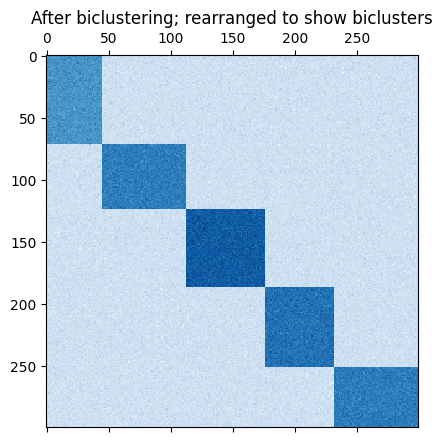

In [28]:
# Executing the Spectral Co-Clustering using sklearn

model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

<h1>IMPLEMENTING SPECTRAL BICLUSTERING (ALGO 2)<h1>

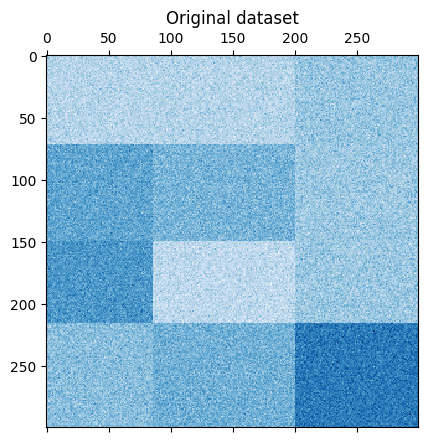

In [14]:
# Generate Sample Data
# Following code is used to make a Bicluster dataset of 300x300, with 5 clusters, using the 'make_checkerboard' from sklearn.datasets. 
# This Dataset is then shuffled. Then using the Spectral SpectralBiclustering algorithm we get the biclusters.
# We then compare the original dataset and the one which is generated after implementing Spectral Co-Clustering using the consensus score

from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=42
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
_ = plt.show()

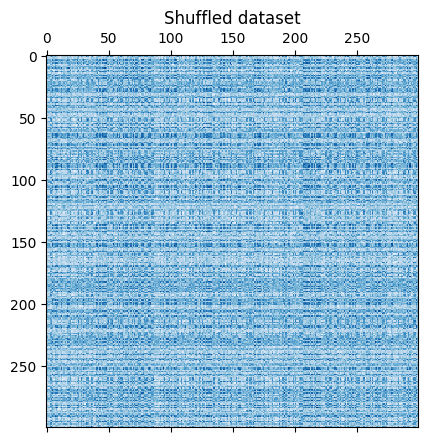

In [15]:
# Shuffle the Dataset

# Creating lists of shuffled row and column indices
rng = np.random.RandomState(0)
row_idx_shuffled = rng.permutation(data.shape[0])
col_idx_shuffled = rng.permutation(data.shape[1])

data = data[row_idx_shuffled][:, col_idx_shuffled]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
_ = plt.show()

In [16]:
# Implement the SpectralBiclustering from sklearn

from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)

# Compute the similarity of two sets of biclusters
score = consensus_score(
    model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")

consensus score: 1.0


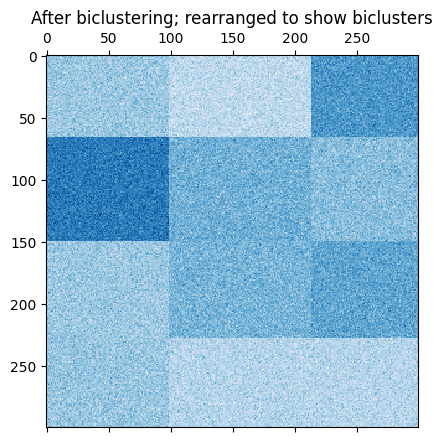

In [17]:
# Reordering first the rows and then the columns.
reordered_rows = data[np.argsort(model.row_labels_)]
reordered_data = reordered_rows[:, np.argsort(model.column_labels_)]

plt.matshow(reordered_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
_ = plt.show()

References : 
<br>
1.Scikit-learn 106:Unsupervised Learning 10: Intuition Bi-clustering [https://www.youtube.com/watch?v=lSouaYx3TI4]
<br>
2.A demo of the Spectral Co-Clustering algorithm [https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_coclustering.html#sphx-glr-auto-examples-bicluster-plot-spectral-coclustering-py ]
<br>
3.A demo of the Spectral Biclustering algorithm [https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_biclustering.html]
<br>
4.Finding the consensus score [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.consensus_score.html#sklearn.metrics.consensus_score ]